In [1]:
import cv2
import cv2#importing numpy
import numpy as np#importing pandas to read the CSV file containing our data
import pandas as pd#importing keras and sub-libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import pytesseract

In [2]:
a=cv2.imread('image.jpg')
b=cv2.imread(r"C:\Users\golup\Desktop\plate_model\test foldder\loop trial\lp_img7.jpg")


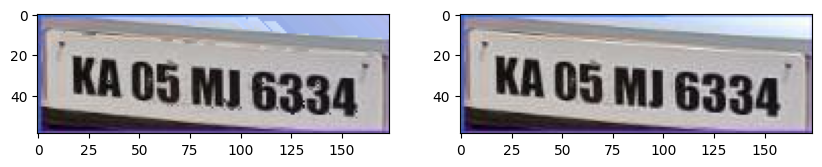

In [6]:
import matplotlib.pyplot as plt
img  = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
backup= img.copy()
for i in range(len(img[:,0,0])):
    for j in range(len(img[0,:,0])):
        R =int(img[i,j,0])
        G =int(img[i,j,1])
        B =int(img[i,j,2])

        sum_col = R+G+B

        if (sum_col >180) & (R>200) & (G>200) & (B>200):
            img[i,j,0] = img[i-1,j-1,0]
            img[i,j,1] = img[i-1,j-1,1]
            img[i,j,2] = img[i-1,j-1,2]

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(img) 
plt.subplot(1, 2, 2), plt.imshow(backup)
plt.show()

(57, 172, 3)


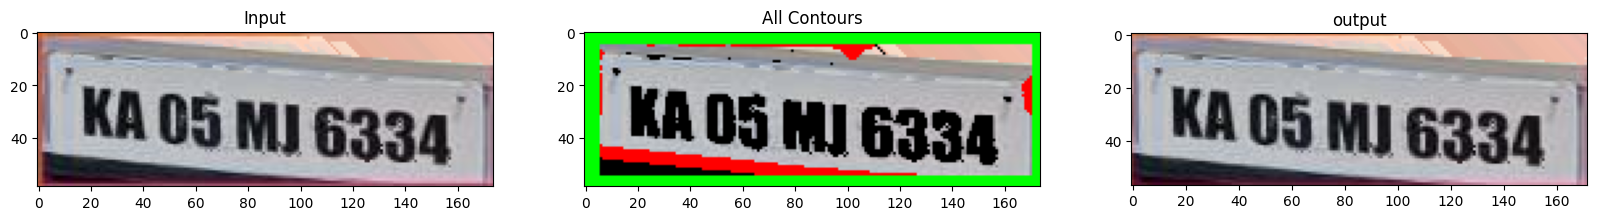

In [9]:





image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# red color boundaries [B, G, R]
lower = [np.mean(image[:,:,i] - np.std(image[:,:,i])/3 ) for i in range(3)]
upper = [250, 250, 250]

# create NumPy arrays from the boundaries
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

# find the colors within the specified boundaries and apply
mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask=mask)

ret,thresh = cv2.threshold(mask, 40, 255, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


if len(contours) != 0:
	# draw in blue the contours that were founded
	cv2.drawContours(output, contours, -1, 255, 3)

	# find the biggest countour (c) by the area
	c = max(contours, key = cv2.contourArea)
	x,y,w,h = cv2.boundingRect(c)

	# draw the biggest contour (c) in green
	cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),5)

foreground = image[y:y+h,x:x+w]
plt.figure(figsize=(20,4))
plt.subplot(1,3,1),plt.imshow(image),plt.title("Input")
plt.subplot(1,3,2),plt.imshow(output),plt.title("All Contours")
plt.subplot(1,3,3),plt.imshow(foreground),plt.title("output")
print(foreground.shape)
plt.show()

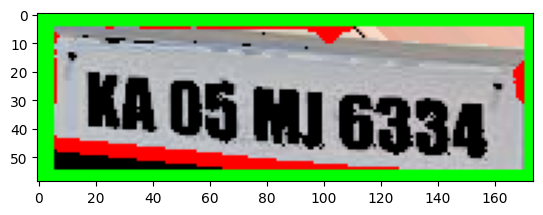

In [10]:
plt.imshow(output)

In [11]:
import easyocr
reader=easyocr.Reader(['en'])


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [12]:
img = cv2.resize(output, (200, 50))
# edges = cv2.Canny(img, 100, 200)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_binary = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('img',img_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()
img_blur = cv2.blur(img_binary,(2,2))

cv2.imshow('img',img_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()
img_dilate = cv2.dilate(img_blur, (3,3))
cv2.imshow('img',img_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()
LP_WIDTH = img_dilate.shape[0]
LP_HEIGHT = img_dilate.shape[1]
img_dilate[0:3,:] = 255
img_dilate[:,0:3] = 255
img_dilate[72:75,:] = 255
img_dilate[:,330:333] = 255
# (rows,cols)=img_dilate[:2]
# M = cv2.getRotationMatrix2D((rows / 2,  cols / 2), 10, 1)
# res = cv2.warpAffine(img_dilate, M, (rows,cols))
# img_erosion = cv2.erode(img_dilate,kernel=(3,3) , iterations=1)
cv2.imshow('img',img_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()
dimensions = [LP_WIDTH/6, LP_WIDTH/2, LP_HEIGHT/10, 2*LP_HEIGHT/3]
print(dimensions)

[8.333333333333334, 25.0, 20.0, 133.33333333333334]


'{"ParsedResults":[{"TextOrientation":"0","FileParseExitCode":1,"ParsedText":"","ErrorMessage":"","ErrorDetails":""}],"OCRExitCode":1,"IsErroredOnProcessing":false,"ProcessingTimeInMilliseconds":"937","SearchablePDFURL":"Searchable PDF not generated as it was not requested."}'

In [20]:

cntrs, _ = cv2.findContours(img_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
bounds=[]
lower_width = dimensions[0]
upper_width = dimensions[1]
lower_height = dimensions[2]
upper_height = dimensions[3]
cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
x_cntr_list = []
target_contours = []
img_res = []
for cntr in cntrs :

	intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

	if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
		x_cntr_list.append(intX)
		char_copy = np.zeros((44,24))
		char = img_dilate[intY:intY+intHeight, intX:intX+intWidth]
		char = cv2.resize(char, (20, 40))

		char = cv2.subtract(255, char)
		char_copy[2:42, 2:22] = char
		char_copy[0:2, :] = 0
		char_copy[:, 0:2] = 0
		char_copy[42:44, :] = 0
		char_copy[:, 22:24] = 0
		char_copy = cv2.convertScaleAbs(char_copy)
		cv2.imshow('img',char_copy)
		cv2.waitKey(0)
		cv2.destroyAllWindows()
		bounds.append(reader.readtext(char_copy))
		img_res.append(char_copy) 
print(x_cntr_list)
indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
img_res_copy = []
for idx in indices:
	img_res_copy.append(img_res[idx])
img_res = np.array(img_res_copy)

[]


In [15]:
bounds=[]
for img in img_res:
    bounds.append(reader.readtext(img))
print(bounds)

[]


In [11]:
characters = [result[0][1] for result in bounds]
print(characters)

IndexError: list index out of range

(-0.5, 173.5, 58.5, -0.5)

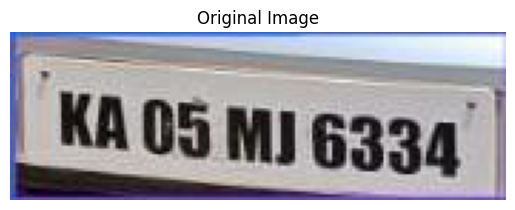

In [34]:
plt.imshow(a[:,:,::-1]);plt.title("Original Image");plt.axis('off')

In [217]:
IMG_COPY=a.copy()
gray=cv2.cvtColor(IMG_COPY,cv2.COLOR_BGR2GRAY)

(-0.5, 173.5, 58.5, -0.5)

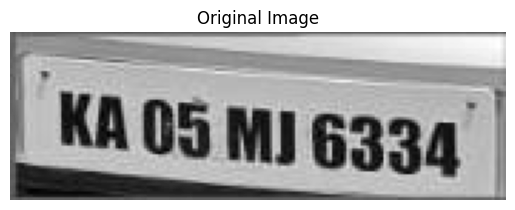

In [218]:
plt.imshow(gray,cmap='gray');plt.title("Original Image");plt.axis('off')

(-0.5, 173.5, 58.5, -0.5)

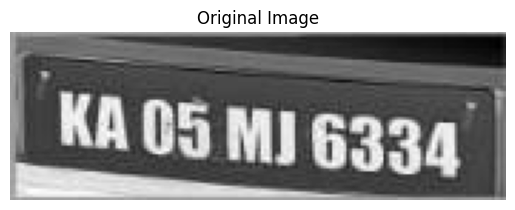

In [219]:
gray_inverted=cv2.bitwise_not(gray)
plt.imshow(gray_inverted,cmap='gray');plt.title("Original Image");plt.axis('off')

(-0.5, 173.5, 58.5, -0.5)

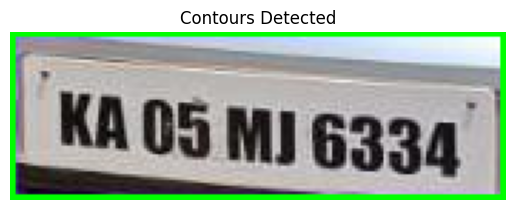

In [220]:
contours,hierarchy=cv2.findContours(gray_inverted,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(IMG_COPY,contours,-1,(0,255,0),2)
plt.imshow(IMG_COPY[:,:,::-1]);plt.title("Contours Detected");plt.axis('off')

(-0.5, 173.5, 58.5, -0.5)

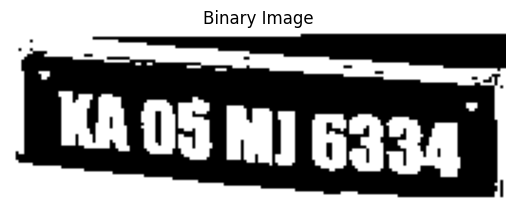

In [ ]:
_,binary=cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
plt.imshow(binary,cmap='gray');plt.title("Binary Image");plt.axis('off')

(-0.5, 173.5, 58.5, -0.5)

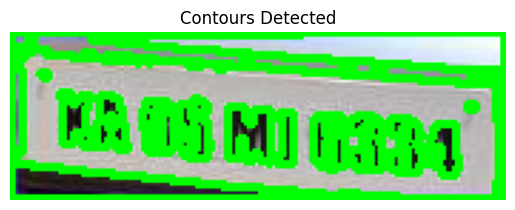

In [222]:
contours,hierarchy=cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(IMG_COPY,contours,-1,(0,255,0),2)
plt.imshow(IMG_COPY[:,:,::-1]);plt.title("Contours Detected");plt.axis('off')

In [308]:
img_copy2=a.copy()

(-0.5, 173.5, 58.5, -0.5)

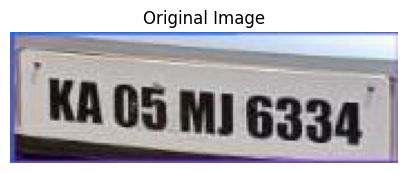

In [309]:
plt.figure(figsize=[5,5])
plt.imshow(img_copy2[:,:,::-1]);plt.title("Original Image");plt.axis('off')

In [314]:
# blurred_img=cv2.GaussianBlur(img_copy2,(3,3),0)
# kernel = np.ones((1,1),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
thin = np.zeros(img_copy2.shape,dtype='uint8')
while (cv2.countNonZero(gray)!=0):
    # Erosion
    erode = cv2.erode(img_copy2,kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset,thin)
    # Set the eroded image for next iteration
    img_copy3 = erode.copy()
cv2.imshow('original',img_copy2)
cv2.imshow('thinned',thin)
cv2.waitKey(0)
# dilation = cv2.dilate(img_copy2,kernel,iterations = 2)
# erosion = cv2.erode(dilation,kernel,iterations = 1)
# plt.figure(figsize=[10,10])
# plt.imshow(erosion,cmap='Greys_r');plt.title("Edgy image");plt.axis('off')

# plt.figure(figsize=[10,10])
# plt.imshow(dilation,cmap='Greys_r');plt.title("Edgy image");plt.axis('off')
# edges=cv2.Canny(closing,250,250)
# plt.figure(figsize=[10,10])
# plt.imshow(edges,cmap='Greys_r');plt.title("Edgy image");plt.axis('off')

(-0.5, 173.5, 58.5, -0.5)

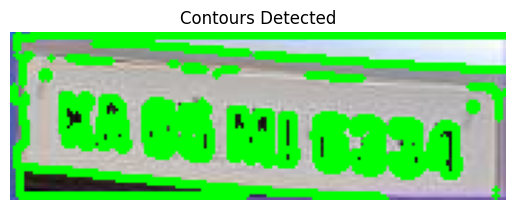

In [305]:
contours,hierarchy=cv2.findContours(edges,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_copy2,contours,-1,(0,255,0),2)
plt.imshow(img_copy2[:,:,::-1]);plt.title("Contours Detected");plt.axis('off')

In [289]:
src_copy=a.copy()

Number of contours returned:53


Text(0.5, 1.0, 'RETR_CCOMP')

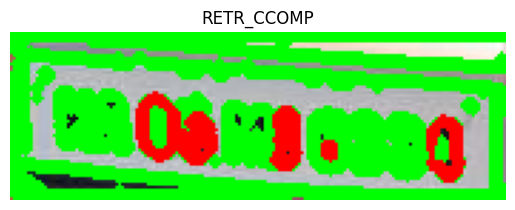

In [206]:

for i,cont in enumerate(contours):
    if hierarchy[0][i][3]==-1:
        src_copy=cv2.drawContours(src_copy,cont,-1,(0,255,0),3)
    else:
        src_copy=cv2.drawContours(src_copy,cont,-1,(255,0,0),3)
print("Number of contours returned:{}".format(len(contours)))
# plt.figure(figsize=[10][10])
plt.imshow(src_copy);plt.axis('off');plt.title('RETR_CCOMP')

(-0.5, 173.5, 58.5, -0.5)

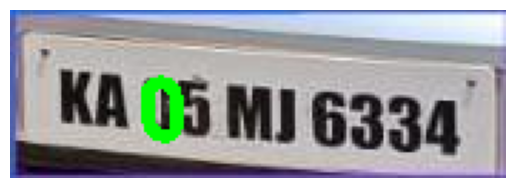

In [290]:
biggest_contour=max(contours,key=cv2.contourArea)
cv2.drawContours(src_copy,biggest_contour,-1,(0,255,0),4)
# plt.figure(figsize=[1][1])
plt.imshow(src_copy[:,:,::-1]);plt.axis('off')

In [166]:
cv2.contourArea(biggest_contour)

1100.5